# Square Grid Cells

In [1]:
import numpy as np
from matplotlib import pyplot as plt

$0 = \partial_{x} G_{xx} = \frac{2\pi}{a} \sum_{j} \sin{\left( \frac{4\pi}{a}\cdot(x - \phi_{x}^{j}) \right)}$

$0 = G_{xy} = \frac{1}{2} \sum_{j} \cos{\left( \frac{2\pi}{a}\, (\xi - \phi_{\xi}^{j}) \right)} + \frac{1}{2} \sum_{j} \cos{\left( \frac{2\pi}{a}\, (\eta - \phi_{\eta}^{j}) \right)}$

## Fundamental solutions

$0 = \sum_{j=1}^{N} \cos{\left( \frac{2\pi}{a}\, (x - \phi^{j}_{x}) \right)} = \sum_{j=1}^{N} \cos{\left( \frac{2\pi}{a}\, x - \hat{\phi}^{j}_{x} \right)}$

In [2]:
N = 12
phis = 2*np.pi*np.arange(0, N) / N
x = np.linspace(0.0, 2*np.pi, num=50)
S = np.cos(x[:, None] - phis[None, :]).sum(axis=-1)

(-1.0, 1.0)

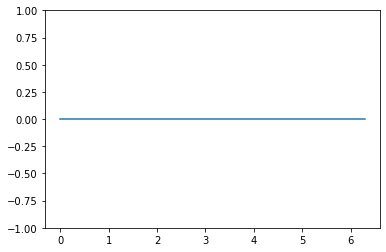

In [3]:
fig, ax = plt.subplots()
ax.plot(x, S)
ax.set_ylim([-1, 1])

In [4]:
S.sum()

-1.186550857568136e-15

## Fundamental Similitude solutions
### N = 3

In [5]:
def g_xx(a: float, phases_x: np.array, x: np.array) -> np.array:
    return (np.sin((2*np.pi / a)*(x[:, None] - phases[None, :]))**2).sum(axis=-1)

In [6]:
def d_g_xx(a: float, phases_x: np.array, x: np.array) -> np.array:
    return ((2*np.pi/a)*np.sin((4*np.pi / a)*(x[:, None] - phases[None, :]))).sum(axis=-1)

In [7]:
def g_yy(a: float, phases_y: np.array, y: np.array) -> np.array:
    return (np.sin((2*np.pi / a)*(y[:, None] - phases[None, :]))**2).sum(axis=-1)

In [8]:
def d_g_yy(a: float, phases_y: np.array, y: np.array) -> np.array:
    return ((2*np.pi/a)*np.sin((4*np.pi / a)*(y[:, None] - phases[None, :]))).sum(axis=-1)

In [9]:
def g_xy(a: float, phases_x: np.array, phases_y: np.array, x: np.array, y: np.array) -> np.array:
    return (np.sin((2*np.pi / a)*(x[:, None] - phases_x[None, :]))*np.sin((2*np.pi / a)*(y[:, None] - phases_y[None, :]))).sum(axis=-1)

In [18]:
N = 4
a = 1.0

phi_i_j = a*np.arange(0, 2*N) / (2*N)


In [19]:
def cartesian_product(*arrays):
    la = len(arrays)
    dtype = np.result_type(*arrays)
    arr = np.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(np.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)

In [22]:
x = np.random.uniform(low=0.0, high=2*np.pi, size=9)
y = np.random.uniform(low=0.0, high=2*np.pi, size=9)

atol = 1e-12

phases_that_work = []
cart_product = cartesian_product(*[phi_i_j for i in range(2*N)])

for phases in cart_product:
    phases_x = phases[:N]
    phases_y = phases[N:]
    if (np.abs(d_g_xx(a, phases_x, x).sum()) < atol) and (np.abs(d_g_yy(a, phases_y, y).sum()) < atol) and (np.abs(g_xy(a, phases_x, phases_y, x, y)).sum() < atol):
        phases_that_work.append(np.array([phases_x, phases_y]))
    #phases_x, phases_y = phases.reshape(2, N)
    #print(phi)
    #if np.sin(2*np.pi*(x[:, None] - phases[None, :]) / a).sum(axis=-1).sum() < 1e-8:
    #    print(phases_x)
    #print(phases_x, phases_y)
    #print(np.abs(g_xy(a, phases_x, phases_y, x, y).sum()))
    #if np.abs(g_xy(a, phases_x, phases_y, x, y).sum()) < atol:
    #    print(phases_x, phases_y)

In [23]:
len(phases_that_work)

15744

In [27]:
len(cart_product)

16777216

In [379]:
phi_x, phi_y = phases_that_work[16]
fig, axs = plt.subplots(1, 3)
axs[0].plot(g_xy(a, phi_x, phi_y, x, y))
axs[0].set_ylim([-1, 1])
axs[1].plot(g_xx(a, phi_x, x))
axs[2].plot(g_yy(a, phi_y, y))

IndexError: list index out of range

10000000000

8